In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
learning_rate = 5

In [3]:
# sigmoid activation function
def sigmoid(input):
    return 1 / (1 + np.exp(-input))

# derivative of sigmoid activation function
def dsigmoid(input):
    return input * (1 - input)

# relu activation function
def relu(x):
    return np.maximum(0, x)

# derivative of relu activation function
def drelu(x):
    return np.where(x > 0, 1, 0)

In [4]:
# exclusive or function (true when number of true outputs is odd)
inputs = np.array([
    [0, 1], 
    [1, 0], 
    [0, 0], 
    [1, 1]
])
target_output = np.array([
    [1], 
    [1], 
    [0], 
    [0]
])

In [5]:
np.random.seed(1)
# initialize weights
weights_1 = 2 * np.random.randn(2,2) - 1
weights_2 = 2 * np.random.randn(2,1) - 1
#weights_1 = np.random.randn(2,2)*np.sqrt(2/4)
#weights_2 = np.random.randn(2,1)*np.sqrt(2/3)

# initialize bias
hidden_1_bias = 1
output_bias = 1

In [6]:
#takes in the inputs and adjusts the weights accordingly
def train(batch):
    global weights_2
    global weights_1
    global hidden_1_bias
    global output_bias

    ## feedforward
    layer_1_output = sigmoid(np.add(np.dot(batch, weights_1), hidden_1_bias))
    output = sigmoid(np.add(np.dot(layer_1_output, weights_2), output_bias))

    ## backprop
    
    # output layer
    output_error = np.subtract(target_output, output)
    output_gradient = output_error * dsigmoid(output) 
    output_delta = np.dot(layer_1_output.T, output_gradient) 

    # hidden layer 1
    layer_1_error = np.dot(output_gradient, weights_2.T)
    layer_1_gradient = layer_1_error * dsigmoid(layer_1_output) 
    layer_1_delta = np.dot(batch.T, layer_1_gradient)

    # update bias
    output_bias += np.average(output_gradient) * learning_rate
    hidden_1_bias += np.average(layer_1_gradient)* learning_rate
    
    # update weights
    weights_2 += output_delta * learning_rate
    weights_1 += layer_1_delta * learning_rate

    return output_error, output

In [7]:
error_list = []
index = []
for i in range(8001):
    nn_error, nn_output = train(inputs)
    mse = np.average(nn_error * nn_error)
    error_list.append(mse)
    index.append(i)
    if (i % 4000) == 0:
        print(mse)
        print(nn_output)

0.23797373724346188
[[0.6460795 ]
 [0.6058299 ]
 [0.07163049]
 [0.81617047]]
0.00011427463809309727
[[0.99081216]
 [0.99077529]
 [0.0075054 ]
 [0.01520709]]
5.2558839829416114e-05
[[0.99378428]
 [0.99376347]
 [0.00517427]
 [0.01029237]]


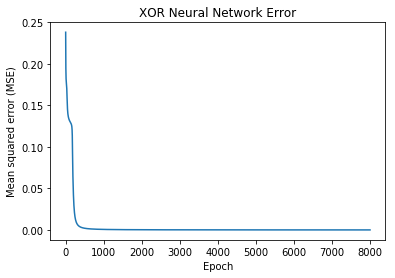

In [8]:
# plot mse vs. epoch
plt.plot(index, error_list)
plt.xlabel('Epoch')
plt.ylabel('Mean squared error (MSE)')
plt.title('XOR Neural Network Error')
plt.show()

In [9]:
error_list[2000] #0.00026032175346313156

0.00026032175346313156